# BM 336546 - HW2: Type 1 Diabetes (T1D)
Daniel sapir & Naama Rivlin

### **Assignment Goal:**
To predict if a patient has T1D, based on binary data from a simple yes/no questionnaire about the patient's medical history, using ML algorithms.

## **Theory Questions**:

**Q1:** To evaluate how well our model performs at T1D classification, we need to have evaluation
metrics that measures of its performances/accuracy. Which evaluation metric is more
important to us: model accuracy or model performance? Give a simple example that
illustrates your claim.

**Q1 Answer:** Accurecy is the fraction of predictions our model got right. Sometimes, accuracy can be misleading, for example when we have very imbalanced data. classification algorithm with an accuracy of 90% could be considered a highly accurate algorithm, but if the data is with a ratio of 90%-10%, even a naive classifier would achieve this accuracy. Therefore, in many cases other evaluation metrics such as F1 score and AUROC are more important.  

**Q2:** T1D is often associated with other comorbidities such as a heart attack. You are asked to
design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant
patient features for the algorithm may include blood pressure (BP), body-mass index (BMI),
age (A), level of physical activity (P), and income (I). You should choose between two
classifiers: the first uses only BP and BMI features and the other one uses all of the features
available to you. Explain the pros and cons of each choice.

**Q2 Answer:** \
Using only the **BP and BMI features**:
* Advantage: The required computing power is smaller and it is easier to do data exploration and to clean the data
* Disadvantage: We are not guaranteed that these are the two most important features for the purpose of classification (unless it has been tested before in some studies or algorithms), and even if they are the two most important features, throwing away the other features results in information loss so in some cases there will be some harm, even if small, in the quality of the classification

Using **all the features** available:
* Advantage: The model will perform better because it has more information, assuming all the data is clean and reliable
* Disadvantage: The required computing power is large, particularly when there are a lot of parameters to tune and when the training set is large.

In conclusion, using all the features allows for better performance but is more computationally expensive, whereas using only two features there is a risk of lower performance but less computational power is required.

**Q3:** A histologist wants to use machine learning to tell the difference between pancreas biopsies
that show signs of T1D and those that do not. She has already come up with dozens of
measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which
model to use. The biopsies are really similar, and it is difficult to distinguish them from the
human eye, or by just looking at the features. Which of the following is better: logistic
regression, linear SVM or nonlinear SVM? Explain your answer.

**Q3 Answer:** Since the biopsies are very similar and it difficult to distinguish them from looking at the features, it is likely that the data is not linearly seperable. For this reason, logistic regression and linear SVM will probably not be good enough, and it will be better for her to use non-linear SVM.

**Q4:** What are the differences between LR and linear SVM and what is the difference in the
effect/concept of their hyper-parameters tuning?

**Q4 Answer:** \
Generally, LR determines a probability that is a logistic function of a linear combination of the predictors, while SVM aims to fit a hyperplane that separates two classes of data based on the data points at the edge of each class. In other words, LR fits the data points as if they are along a continuous function, while SVM fits the data points assuming there are two classes that can be geometrically seperated.
In SVM, a line is considered better than another line if it's margin is larger, meaning it is farther from both classes. In LR, a line is better than another line if the the distribution defined by it is low at points that belong to class −1 and high at points that belong to class +1  on average (compared to the distribution defined by another line).
Accordingly, SVM only considers points near the margin (support vectors) while LR considers all the points in the data set.
When there is a separating hyperplane, non-regularized logistic regression is not as good as linear SVM, because the maximum likelihood is achieved by any separating plane, and there is no guarantee we will get the best one. We might get poor predictive power near the margin.

Model hyperparameters, as opposed to model parameters that are estimated from data automatically, are set and tuned manually. Hyper-parameters help us find the balance between bias and variance, thus prevent the model from overfitting or underfitting. 

Hyper-parameters in linear SVM: \
SVM tries to separate the classes and does not allow any misclassification. in some cases, a decision boundary cannot be found with a standard SVM (for non-linear SVM, we might get an overfit model, but for this question we will only talk about linear SVM). To overcome this issue, we use "soft margin" SVM which allows some misclassification (being on the "wrong side" of decision boundary). The optimization problem's goals are to increase the distance of decision boundary to classes, while maximizing the number of points that are correctly classified. The trade-off of the 2 goals is controlled by **c hyper-parameter**, which adds a penalty for each misclassified data point. The smaller c is, the smaller the penalty is, so we gat a large margin at the expense of more misclassifications, and vice versa. Penalty proportional to the distance to decision boundary.

Hyper-parameters in LR: \



## **Coding Assignment:**

There are 565 patients in the database. Some features have missing values. We will start by loading the data from the file HW2_data.csv and do pre-processing.

### **Part 1 - Data loading and Pre-processing:**

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns

file = Path.cwd().joinpath('HW2_data.csv')
T1D_dataset = pd.read_csv(file)

random.seed(10)

We know that the nurse who collected the data said that not all patients answered all the questions. So in some features there are empty values, and we have to decide what to do with them. One option is to through features that have missing values. Another option is delete rows that have missing values. A third option is to fill in the missing cells with random samples from the features. To choose the right option for us, we will first check how many features have empty cells and how many empty cells there are. Than we will check in how many rows there are empty cells, and weather there is a balance between the number of patients with empty values whose diagnosis is "Positive" and those diagnosed as "Negative".

In [2]:
from functions import nancount as ncount
nan_count = ncount(T1D_dataset)
print("The number of nan's in each feature:")
nan_count

The number of nan's in each feature:


{'Age': 0,
 'Gender': 0,
 'Increased Urination': 0,
 'Increased Thirst': 20,
 'Sudden Weight Loss': 9,
 'Weakness': 0,
 'Increased Hunger': 13,
 'Genital Thrush': 14,
 'Visual Blurring': 0,
 'Itching': 11,
 'Irritability': 0,
 'Delayed Healing': 0,
 'Partial Paresis': 0,
 'Muscle Stiffness': 15,
 'Hair Loss': 0,
 'Obesity': 0,
 'Diagnosis': 0,
 'Family History': 0}

We can observe that the largest number of nan's is in the feature 'Increased Thirst' and is equal to 20 (out of 565). This is a relatively small number, so we don't have to through the feature. In most of the features there are no nan's at all.

Before dropping rows with missing values we had:
{'Positive': 343, 'Negative': 222}


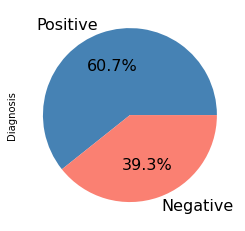

After dropping rows with missing values we have:
{'Positive': 321, 'Negative': 202}


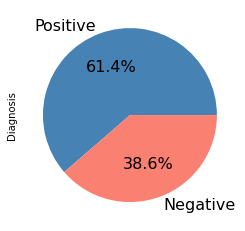

Number of rows with missing values:


42

In [3]:
feat = 'Diagnosis_Positive'
T1D_dummy = pd.get_dummies(T1D_dataset, dummy_na=False, drop_first=True)  # turn all the columns to 0/1 (except 'Age')
T1D_diag = pd.DataFrame(T1D_dummy[feat])

T1D_no_missing = T1D_dataset.copy().dropna()
T1D_no_missing_dummy = pd.get_dummies(T1D_no_missing, dummy_na=False, drop_first=True)
T1D_diag_no_missing = pd.DataFrame(T1D_no_missing_dummy[feat])

diag_cnt = T1D_dataset['Diagnosis'].value_counts().to_dict()
diag_cnt_no_missing = T1D_no_missing['Diagnosis'].value_counts().to_dict()
print("Before dropping rows with missing values we had:")
print(diag_cnt)
T1D_dataset['Diagnosis'].value_counts().plot(kind="pie", labels=['Positive', 'Negative'], colors=['steelblue', 'salmon'], autopct='%1.1f%%', fontsize=16)
plt.show()
print("After dropping rows with missing values we have:")
print(diag_cnt_no_missing)
T1D_no_missing['Diagnosis'].value_counts().plot(kind="pie", labels=['Positive', 'Negative'], colors=['steelblue', 'salmon'], autopct='%1.1f%%', fontsize=16)
plt.show()
print("Number of rows with missing values:")
len(T1D_dataset['Diagnosis'])-len(T1D_no_missing['Diagnosis'])

We see that we lost a similar number of patients from each diagnosis class, and that the fractions of the classes are similar before and after deletion.
We understand from it that by erasing full rows we did not change the balance dramatically.

However, deleting 42 lines out of 565 causes a loss of quite a bit of information, especially considering the fact that there are relatively few patients diagnosed as "Negative", so this information is important. 

For this reason we decided to complete the missing values by random sampling of features, in a way that takes the distribution of the feature into account:

In [4]:
from functions import nan2samp
T1D_clean = nan2samp(T1D_dataset)

### **Part 2 - Train-Test Split:**

In [5]:
lbl = np.ravel(T1D_clean['Diagnosis'])
X_train_tmp, X_test_tmp, y_train, y_test = train_test_split(T1D_clean, lbl, test_size=0.2, random_state=10, stratify=lbl)
X_train = X_train_tmp.drop(columns=['Diagnosis'])
X_test = X_test_tmp.drop(columns=['Diagnosis'])

### **Part 3 - Visualization and exploration of the data**

**3.a. An analysis to show that the distribution of the features is similar between test and train:**

We created a table showing distribution between each feature label in Train and Test Sets:

In [6]:
from functions import dist_table as dist
X_test_dummy = pd.get_dummies(X_test, dummy_na=False, drop_first=True)
X_train_dummy = pd.get_dummies(X_train, dummy_na=False, drop_first=True)
d_table = dist(X_train_dummy, X_test_dummy)
d_table.transpose()

,Train %,Test %,Delta %
Family History,48.672566,58.407080,-9.734513
Gender_Male,62.610619,68.141593,-5.530973
Increased Urination_Yes,48.451327,47.787611,0.663717
Increased Thirst_Yes,44.690265,44.247788,0.442478
Sudden Weight Loss_Yes,40.707965,43.362832,-2.654867
Weakness_Yes,55.752212,62.831858,-7.079646
Increased Hunger_Yes,44.690265,45.132743,-0.442478
Genital Thrush_Yes,21.238938,28.318584,-7.079646
Visual Blurring_Yes,44.247788,47.787611,-3.539823
Itching_Yes,48.008850,51.327434,-3.318584


**Q3.a.i:** What issues could an imbalance of features between train and test cause?

**Q3.a.i Answer:**

**Q3.a.ii:** How could you solve the issue?

**Q3.a.ii Answer:**


**3.b. Plots to show the relationship between feature and label:**

We created a plot showing the frequency of each feature according to Diagnosis:

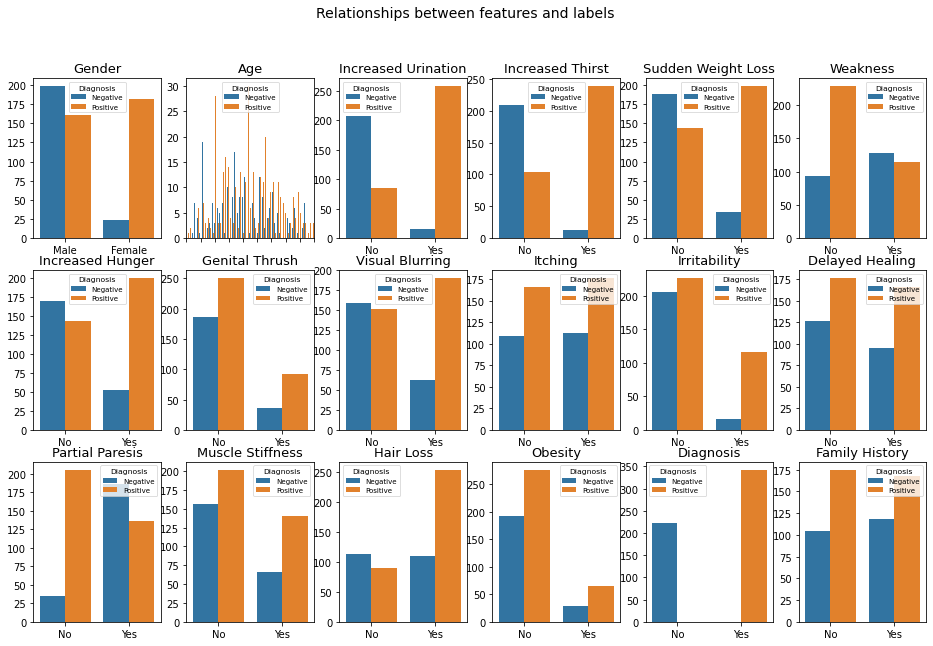

()

In [7]:
from functions import feat_lab_cor as fl_cor
fl_cor(T1D_clean)



**3.c. Additional plots:**
